In [22]:
import os
import pickle
import matplotlib.pyplot as plt  # import plt before librosa, conflict!
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa.display
from sklearn.decomposition import PCA

PICKLE_DIR = 'D:\9999_OneDrive_ZHAW\OneDrive - ZHAW\BA_ZHAW_RTO\pickle'
PICKLE_DIR_SMALL = 'D:\9999_OneDrive_ZHAW\OneDrive - ZHAW\BA_ZHAW_RTO\pickle\subset'
root = 'Z:\\BA\\mimii_baseline\\dataset'

# Functions

In [15]:
# pickle I/O
def save_pickle(filename, save_data, root=PICKLE_DIR):
    """
    picklenize the data.

    filename : str
        pickle filename
    data : free datatype
        some data will be picklenized

    return : None
    """
    filepath = os.path.join(root, filename) + '.pickle'
    with open(filepath, 'wb') as sf:
        pickle.dump(save_data, sf)


def load_pickle(filename, root=PICKLE_DIR):
    """
    unpicklenize the data.

    filename : str
        pickle filename

    return : data
    """
    filepath = os.path.join(root, filename) + '.pickle'
    with open(filepath, 'rb') as lf:
        load_data = pickle.load(lf)
    return load_data


# Normalization
def normalize_data(x, lb, ub, max_v=1.0, min_v=-1.0):
    '''
    Max-Min normalize of 'x' with max value 'max_v' min value 'min_v'
    '''

    # Set-up
    if len(ub)==0:
        ub = x.max(0) # OPTION 1
        # applied to the first dimension (0) columns of the data
        #ub = np.percentile(x, 99.9, axis=0, keepdims=True) # OPTION 2:
        
    if len(lb)==0:
        lb = x.min(0) 
        #lb = np.percentile(x, 0.1, axis=0, keepdims=True)
    
    ub.shape = (1,-1)
    lb.shape = (1,-1)           
    max_min = max_v - min_v
    delta = ub-lb

    # Compute
    x_n = max_min * (x - lb) / delta + min_v
    if 0 in delta:
        idx = np.ravel(delta == 0)
        x_n[:,idx] = x[:,idx] - lb[:, idx]

    return x_n, lb, ub 


# extended pickle loader
def load_data(key_name, pickle_dir):
    file_locs = load_pickle(f'{key_name}', root=pickle_dir)
    data = load_pickle(f'{key_name}_data', root=pickle_dir)
    labels = load_pickle(f'{key_name}_labels', root=pickle_dir)
    data_n = load_pickle(f'{key_name}_data_n', root=pickle_dir)
    return file_locs, data, labels, data_n

def load_data_sub(key_name, pickle_dir):
    file_locs = load_pickle(f'{key_name}', root=pickle_dir)
    data = load_pickle(f'{key_name}_data', root=pickle_dir)
    labels = load_pickle(f'{key_name}_labels', root=pickle_dir)
    data_n = load_pickle(f'{key_name}_data_n', root=pickle_dir)

    return file_locs, data, labels, data_n


# load data & normalize

## load total 6dB

In [10]:
six_norm = load_pickle('six_norm')
six_abnorm = load_pickle('six_abnorm')
six_norm_data = load_pickle('six_norm_data')
six_abnorm_data = load_pickle('six_abnorm_data')

six_norm_data_n, lb, ub = normalize_data(six_norm_data, [], [], max_v=1.0, min_v=0.0)
print(six_norm_data_n)
print(len(six_norm))

six_abnorm_data_n, lb, ub = normalize_data(six_abnorm_data, [], [], max_v=1.0, min_v=0.0)
print(six_abnorm_data_n)
print(len(six_abnorm))

[[0.50680536 0.49459252 0.5638561  ... 0.52019787 0.5181766  0.5108569 ]
 [0.6925782  0.6364584  0.70216686 ... 0.5696227  0.57920265 0.6265522 ]
 [0.65501666 0.5968383  0.70810354 ... 0.5323048  0.5360604  0.5510274 ]
 ...
 [0.73291856 0.76494384 0.623315   ... 0.28893778 0.29114878 0.24939412]
 [0.7974568  0.69309485 0.67207146 ... 0.30297497 0.2746842  0.2960698 ]
 [0.8139511  0.7084099  0.6487108  ... 0.25420263 0.2499758  0.27348074]]
3749
[[0.33771682 0.27785784 0.26559427 ... 0.18123129 0.19518875 0.1974282 ]
 [0.28140482 0.26396242 0.3544001  ... 0.19414781 0.20980471 0.2064001 ]
 [0.31561092 0.3216098  0.32545492 ... 0.16656087 0.18521224 0.214315  ]
 ...
 [0.8104279  0.81536496 0.9197512  ... 0.13417602 0.16365665 0.20735407]
 [0.9157321  0.85799456 0.8580185  ... 0.1800388  0.1731957  0.19838832]
 [0.78237855 0.8666426  0.8218058  ... 0.17870124 0.17531979 0.22040789]]
456


## load total 0dB

In [15]:
zero_norm = load_pickle('zero_norm')
zero_abnorm = load_pickle('zero_abnorm')
zero_norm_data = load_pickle('zero_norm_data')
zero_abnorm_data = load_pickle('zero_abnorm_data')

zero_norm_data_n, lb, ub = normalize_data(zero_norm_data, [], [], max_v=1.0, min_v=0.0)
print(zero_norm_data_n)

zero_abnorm_data_n, lb, ub = normalize_data(zero_abnorm_data, [], [], max_v=1.0, min_v=0.0)
print(zero_abnorm_data_n)

[[0.73728985 0.6460692  0.6629794  ... 0.545584   0.5388521  0.5102194 ]
 [0.84888244 0.80061233 0.8206129  ... 0.5823232  0.58611345 0.63554174]
 [0.87091136 0.8329002  0.7845577  ... 0.5610259  0.5632584  0.56067055]
 ...
 [0.73154956 0.59380925 0.6603504  ... 0.42220742 0.4071814  0.39943376]
 [0.83514744 0.7438794  0.7477194  ... 0.4088267  0.4015441  0.3715983 ]
 [0.78377706 0.6427157  0.6818675  ... 0.39093718 0.36927816 0.35829687]]
[[0.21201208 0.20135647 0.41367725 ... 0.27449733 0.30214995 0.25236645]
 [0.13641445 0.24955566 0.4225957  ... 0.32315472 0.3496258  0.2702812 ]
 [0.37400025 0.29043868 0.30046636 ... 0.2767254  0.2720074  0.27716863]
 ...
 [0.6763414  0.66216755 0.70358616 ... 0.17621449 0.25031874 0.2118691 ]
 [0.6945502  0.67943084 0.74083847 ... 0.18252513 0.22859316 0.19748057]
 [0.7195341  0.64461404 0.5890883  ... 0.24996601 0.22669643 0.20041929]]


## load total min6dB

In [16]:
min_six_norm = load_pickle('min_six_norm')
min_six_abnorm = load_pickle('min_six_abnorm')
min_six_norm_data = load_pickle('min_six_norm_data')
min_six_abnorm_data = load_pickle('min_six_abnorm_data')

min_six_norm_data_n, lb, ub = normalize_data(min_six_norm_data, [], [], max_v=1.0, min_v=0.0)
print(min_six_norm_data_n)

min_six_abnorm_data_n, lb, ub = normalize_data(min_six_abnorm_data, [], [], max_v=1.0, min_v=0.0)
print(min_six_abnorm_data_n)

[[0.6569681  0.5659254  0.2635445  ... 0.7291967  0.6602214  0.6963374 ]
 [0.7873399  0.64469767 0.57486385 ... 0.7645949  0.67001164 0.68628687]
 [0.8513689  0.8421368  0.7604471  ... 0.7424327  0.6821549  0.6961556 ]
 ...
 [0.69251037 0.6237313  0.65007997 ... 0.310776   0.28513685 0.2838351 ]
 [0.8271615  0.7289344  0.70142776 ... 0.308973   0.26508662 0.24437788]
 [0.7763617  0.5538253  0.6301431  ... 0.26168513 0.26464155 0.2786872 ]]
[[0.4966817  0.45213732 0.42021698 ... 0.36588326 0.41291067 0.4217828 ]
 [0.60483867 0.60773075 0.49371117 ... 0.41041663 0.4147385  0.46495876]
 [0.61299056 0.6549583  0.56729513 ... 0.36044297 0.35666853 0.4023349 ]
 ...
 [0.8083546  0.8051729  0.5175074  ... 0.47991404 0.463165   0.49181813]
 [0.7142188  0.696057   0.7479872  ... 0.46006334 0.4978686  0.42265517]
 [0.78518265 0.75040793 0.56451887 ... 0.42667258 0.48822173 0.46884155]]


## load partial: id_00 all dB 

In [3]:
id00_all_dB_norm = load_pickle('id00_all_dB_norm')
id00_all_dB_abnorm = load_pickle('id00_all_dB_abnorm')
id00_all_dB_norm_data = load_pickle('id00_all_dB_norm_data')
id00_all_dB_abnorm_data = load_pickle('id00_all_dB_abnorm_data')

id00_all_dB_norm_data_n, lb, ub = normalize_data(id00_all_dB_norm_data, [], [], max_v=1.0, min_v=0.0)
print(id00_all_dB_norm_data_n)

id00_all_dB_abnorm_data_n, lb, ub = normalize_data(id00_all_dB_abnorm_data, [], [], max_v=1.0, min_v=0.0)
print(id00_all_dB_abnorm_data_n)

[[0.7248219  0.64752096 0.6492822  ... 0.5089349  0.47291443 0.45769018]
 [0.84171057 0.8014302  0.81332225 ... 0.552324   0.5250063  0.59273547]
 [0.86478496 0.8335857  0.7758017  ... 0.52717185 0.4998153  0.5120555 ]
 ...
 [0.8861617  0.79603726 0.76116824 ... 0.39174253 0.37004897 0.4290131 ]
 [0.79682314 0.7948978  0.77132213 ... 0.38873202 0.41400975 0.45692882]
 [0.7258957  0.7904793  0.8454667  ... 0.40187162 0.4470962  0.4262728 ]]
[[0.28324723 0.348433   0.47201142 ... 0.2427745  0.262492   0.26999846]
 [0.21448372 0.38775593 0.48004255 ... 0.28717238 0.30655408 0.28570822]
 [0.43059143 0.42111    0.37006402 ... 0.24480753 0.23451684 0.29174793]
 ...
 [0.91237235 0.8068247  0.7465579  ... 0.44246423 0.48808265 0.45472622]
 [0.787194   0.7659724  0.6353686  ... 0.44871184 0.45854664 0.443147  ]
 [0.8590614  0.8133385  0.8416329  ... 0.41942504 0.40954918 0.41194007]]


### load partial: id_00 6dB 

In [13]:
file_name = 'id00_6dB'

id00_6dB_norm, id00_6dB_norm_data, id00_6dB_norm_labels, id00_6dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id00_6dB_norm_data_n)
id00_6dB_abnorm, id00_6dB_abnorm_data, id00_6dB_abnorm_labels, id00_6dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id00_6dB_abnorm_data_n)
print(len(id00_6dB_norm))

[[0.50680536 0.49459252 0.534202   ... 0.48582694 0.43123582 0.4465847 ]
 [0.6925782  0.6364584  0.6819166  ... 0.5535278  0.5072264  0.592123  ]
 [0.65501666 0.5968383  0.688257   ... 0.5024107  0.45350498 0.49711692]
 ...
 [0.5391299  0.4365312  0.63625014 ... 0.5339344  0.48305562 0.5366724 ]
 [0.39504427 0.34794715 0.5226912  ... 0.49982813 0.5188925  0.5795343 ]
 [0.5010365  0.34402224 0.5903437  ... 0.5364552  0.5471933  0.5185452 ]]
[[0.33771682 0.27785784 0.26559427 ... 0.18123129 0.19518875 0.1974282 ]
 [0.28140482 0.26396242 0.3544001  ... 0.19414781 0.20980471 0.2064001 ]
 [0.31561092 0.3216098  0.32545492 ... 0.16656087 0.18521224 0.214315  ]
 ...
 [0.6177849  0.5451435  0.72553694 ... 0.37715858 0.41393426 0.4761081 ]
 [0.53179485 0.5609169  0.6898305  ... 0.32866263 0.41131774 0.47761726]
 [0.5921611  0.6126838  0.6097828  ... 0.28921074 0.36880115 0.4058862 ]]
1006


### load partial: id_00 0dB 

In [12]:
file_name = 'id00_0dB'

id00_0dB_norm, id00_0dB_norm_data, id00_0dB_norm_labels, id00_0dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id00_0dB_norm_data_n)
id00_0dB_abnorm, id00_0dB_abnorm_data, id00_0dB_abnorm_labels, id00_0dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id00_0dB_abnorm_data_n)

[[0.7248219  0.6460692  0.6492822  ... 0.5508336  0.5041934  0.49037144]
 [0.84171057 0.80061233 0.81332225 ... 0.5977947  0.55973077 0.6350596 ]
 [0.86478496 0.8329002  0.7758017  ... 0.5705719  0.5328736  0.5486187 ]
 ...
 [0.75962055 0.773591   0.7736992  ... 0.54087806 0.4846559  0.55415016]
 [0.79902726 0.81111616 0.6325882  ... 0.52410984 0.5458681  0.60637325]
 [0.9471523  0.8824311  0.7789625  ... 0.5593604  0.57958084 0.55678195]]
[[0.21201208 0.20135647 0.41367725 ... 0.21131293 0.25032797 0.27131045]
 [0.13641445 0.24955566 0.4225957  ... 0.26952186 0.30411327 0.2917224 ]
 [0.37400025 0.29043868 0.30046636 ... 0.21397838 0.2161795  0.29956993]
 ...
 [0.8225706  0.68023056 0.4863877  ... 0.3685288  0.46625975 0.5089374 ]
 [0.7546989  0.72134197 0.7071129  ... 0.32083333 0.38415465 0.4734852 ]
 [0.8540363  0.72514147 0.7368955  ... 0.32999572 0.4417715  0.50300443]]


### load partial: id_00 -6dB 

In [14]:
file_name = 'id00_min6dB'

id00_min6dB_norm, id00_min6dB_norm_data, id00_min6dB_norm_labels, id00_min6dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id00_min6dB_norm_data_n)
id00_min6dB_abnorm, id00_min6dB_abnorm_data, id00_min6dB_abnorm_labels, id00_min6dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id00_min6dB_abnorm_data_n)

[[0.63985264 0.5659254  0.23037876 ... 0.7093307  0.6359847  0.6975549 ]
 [0.77672935 0.64469767 0.5557181  ... 0.751711   0.6472162  0.6856885 ]
 [0.843953   0.8421368  0.74965894 ... 0.7251773  0.6611468  0.69734025]
 ...
 [0.87051356 0.7678643  0.735249   ... 0.37655395 0.36344188 0.41986668]
 [0.7688945  0.76656747 0.7465049  ... 0.37346828 0.4078637  0.44822958]
 [0.68821734 0.7615386  0.82869595 ... 0.38693595 0.44129717 0.4170825 ]]
[[0.4966817  0.45213732 0.42021698 ... 0.3323866  0.3816216  0.40197816]
 [0.60483867 0.60773075 0.49371117 ... 0.3813207  0.383635   0.45056605]
 [0.61299056 0.6549583  0.56729513 ... 0.3264087  0.31966895 0.38009256]
 ...
 [0.9031078  0.76889133 0.6856179  ... 0.44246423 0.49278715 0.45472622]
 [0.76469487 0.72001696 0.5476933  ... 0.44871184 0.46296647 0.443147  ]
 [0.84416056 0.77668417 0.8035537  ... 0.41942504 0.41349673 0.41194007]]


## load partial: id_02 all dB 

In [4]:
id02_all_dB_norm = load_pickle('id02_all_dB_norm')
id02_all_dB_abnorm = load_pickle('id02_all_dB_abnorm')
id02_all_dB_norm_data = load_pickle('id02_all_dB_norm_data')
id02_all_dB_abnorm_data = load_pickle('id02_all_dB_abnorm_data')

id02_all_dB_norm_data_n, lb, ub = normalize_data(id02_all_dB_norm_data, [], [], max_v=1.0, min_v=0.0)
print(id02_all_dB_norm_data_n)

id02_all_dB_abnorm_data_n, lb, ub = normalize_data(id02_all_dB_abnorm_data, [], [], max_v=1.0, min_v=0.0)
print(id02_all_dB_abnorm_data_n)

[[0.47835067 0.44126213 0.6284849  ... 0.40207207 0.458706   0.46390203]
 [0.8027262  0.77811295 0.7443005  ... 0.3926136  0.42995733 0.45446065]
 [0.68807423 0.67778003 0.80984074 ... 0.38492835 0.41724464 0.4173316 ]
 ...
 [0.70482975 0.720048   0.61743486 ... 0.23806682 0.27009466 0.22291428]
 [0.7261171  0.64283234 0.78592026 ... 0.20601276 0.27150986 0.27691212]
 [0.62694925 0.7862838  0.74097645 ... 0.24860528 0.30592677 0.28013143]]
[[0.5962145  0.48992836 0.33543316 ... 0.30802456 0.27157843 0.3307294 ]
 [0.722894   0.5472786  0.62392354 ... 0.25062415 0.32359076 0.3072995 ]
 [0.9137628  0.7718323  0.61908007 ... 0.3866891  0.39539632 0.3878062 ]
 ...
 [0.81169397 0.77890885 0.67280155 ... 0.7564721  0.75930715 0.81499195]
 [0.79182667 0.80960906 0.6998852  ... 0.7710155  0.78718436 0.8768825 ]
 [0.7904812  0.9047988  0.6676265  ... 0.7789206  0.7816551  0.8238413 ]]


### load partial: id_02 6dB 

In [5]:
file_name = 'id02_6dB'

id02_6dB_norm, id02_6dB_norm_data, id02_6dB_norm_labels, id02_6dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id02_6dB_norm_data_n)
id02_6dB_abnorm, id02_6dB_abnorm_data, id02_6dB_abnorm_labels, id02_6dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id02_6dB_abnorm_data_n)


[[0.5440832  0.6439755  0.6222181  ... 0.36093765 0.37196878 0.35981464]
 [0.8998979  0.82038987 0.49692494 ... 0.29568437 0.3282829  0.36139145]
 [0.7498017  0.7156368  0.7044883  ... 0.29515657 0.35964403 0.32465422]
 ...
 [0.8172595  0.76888555 0.7987503  ... 0.4287517  0.4599059  0.42401493]
 [0.63874984 0.67673004 0.7223499  ... 0.40447354 0.47886026 0.47167784]
 [0.9374134  0.75756395 0.70290357 ... 0.44806585 0.5353129  0.48742434]]
[[0.6712338  0.587827   0.40022662 ... 0.3773672  0.3495068  0.39105573]
 [0.6818248  0.67697865 0.49882624 ... 0.31863004 0.4002726  0.37104803]
 [0.931249   0.78819597 0.6958907  ... 0.48288164 0.48723778 0.45945132]
 ...
 [0.6460937  0.6097046  0.5578041  ... 0.48876986 0.47412467 0.48644644]
 [0.47144273 0.5404353  0.5498365  ... 0.4408789  0.4435569  0.49227348]
 [0.56326574 0.64272666 0.649259   ... 0.5036579  0.46367234 0.42194062]]


### load partial: id_02 0dB 

In [6]:
file_name = 'id02_0dB'

id02_0dB_norm, id02_0dB_norm_data, id02_0dB_norm_labels, id02_0dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id02_0dB_norm_data_n)
id02_0dB_abnorm, id02_0dB_abnorm_data, id02_0dB_abnorm_labels, id02_0dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id02_0dB_abnorm_data_n)

[[0.47835067 0.44126213 0.6284849  ... 0.3988876  0.4810182  0.4955529 ]
 [0.8027262  0.77811295 0.7443005  ... 0.38902313 0.44947106 0.48526135]
 [0.68807423 0.67778003 0.80984074 ... 0.38100803 0.43552092 0.44478902]
 ...
 [0.7811828  0.72267884 0.6601749  ... 0.23735826 0.28615618 0.2635652 ]
 [0.6659062  0.59972245 0.4215633  ... 0.20921594 0.2777274  0.30610725]
 [0.60506064 0.65547526 0.65596294 ... 0.26045728 0.35044986 0.32318193]]
[[0.5763548  0.44039172 0.27738968 ... 0.29483142 0.29833198 0.3667263 ]
 [0.7092649  0.50331163 0.5910769  ... 0.22583929 0.36550727 0.3397244 ]
 [0.90952134 0.7496733  0.5858104  ... 0.38938195 0.4582461  0.43250486]
 ...
 [0.55977976 0.6719675  0.7585252  ... 0.53611314 0.6156326  0.62052464]
 [0.26274827 0.4701959  0.6798356  ... 0.49747393 0.6136622  0.61950785]
 [0.6268559  0.6214276  0.64112157 ... 0.51410776 0.53140193 0.49315935]]


### load partial: id_02 -6dB 

In [7]:
file_name = 'id02_min6dB'

id02_min6dB_norm, id02_min6dB_norm_data, id02_min6dB_norm_labels, id02_min6dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id02_min6dB_norm_data_n)
id02_min6dB_abnorm, id02_min6dB_abnorm_data, id02_min6dB_abnorm_labels, id02_min6dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id02_min6dB_abnorm_data_n)

[[0.40380126 0.24539657 0.2754168  ... 0.41042677 0.40562093 0.37309673]
 [0.6993441  0.69650465 0.66520894 ... 0.31027332 0.3373205  0.3834383 ]
 [0.63425374 0.51565206 0.35506767 ... 0.31895062 0.3134316  0.3471775 ]
 ...
 [0.67368853 0.68727267 0.53945875 ... 0.22239439 0.22378522 0.17871286]
 [0.69722176 0.60101694 0.74228555 ... 0.18710081 0.2252902  0.2365114 ]
 [0.58759147 0.76126295 0.6881811  ... 0.2339979  0.2618907  0.23995732]]
[[0.71049666 0.7402151  0.57030106 ... 0.28981227 0.25891212 0.23869447]
 [0.64736694 0.6994557  0.63897306 ... 0.26587218 0.25655174 0.18471496]
 [0.7647258  0.56927234 0.5851066  ... 0.2928444  0.2697598  0.25510114]
 ...
 [0.79992825 0.7531813  0.6490253  ... 0.7564721  0.75930715 0.82546794]
 [0.77881956 0.78745395 0.67807704 ... 0.7710155  0.78718436 0.88815403]
 [0.77739006 0.8937206  0.6434742  ... 0.7789206  0.7816551  0.83443105]]


## load partial: id_04 all dB 

In [4]:
id04_all_dB_norm = load_pickle('id04_all_dB_norm')
id04_all_dB_abnorm = load_pickle('id04_all_dB_abnorm')
id04_all_dB_norm_data = load_pickle('id04_all_dB_norm_data')
id04_all_dB_abnorm_data = load_pickle('id04_all_dB_abnorm_data')

id04_all_dB_norm_data_n, lb, ub = normalize_data(id04_all_dB_norm_data, [], [], max_v=1.0, min_v=0.0)
print(id04_all_dB_norm_data_n)

id04_all_dB_abnorm_data_n, lb, ub = normalize_data(id04_all_dB_abnorm_data, [], [], max_v=1.0, min_v=0.0)
print(id04_all_dB_abnorm_data_n)

[[0.7769286  0.8224548  0.69143766 ... 0.45937192 0.3923471  0.423719  ]
 [0.8086427  0.75296545 0.57855225 ... 0.42648685 0.3607123  0.38178498]
 [0.7364681  0.708553   0.48545697 ... 0.4217539  0.37455505 0.3971178 ]
 ...
 [0.8244456  0.82635194 0.7781669  ... 0.32135874 0.3595307  0.38627005]
 [0.8363327  0.6118937  0.7458087  ... 0.34716198 0.34690762 0.35220587]
 [0.79092556 0.70574766 0.8190642  ... 0.32823217 0.3695291  0.3720941 ]]
[[0.7214526  0.6611888  0.63799775 ... 0.48153082 0.4451818  0.45896912]
 [0.8099657  0.72089565 0.6567412  ... 0.47680265 0.47231784 0.49107674]
 [0.8419261  0.843821   0.7703941  ... 0.46028298 0.4691069  0.48329064]
 ...
 [0.5198146  0.46797845 0.3403272  ... 0.31944644 0.3392516  0.27911392]
 [0.38298663 0.46807337 0.5800337  ... 0.31914034 0.34049156 0.34496915]
 [0.5612524  0.5470447  0.63125056 ... 0.32161885 0.29092753 0.3139828 ]]


### load partial: id_04 6dB 

In [5]:
file_name = 'id04_6dB'

id04_6dB_norm, id04_6dB_norm_data, id04_6dB_norm_labels, id04_6dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id04_6dB_norm_data_n)
id04_6dB_abnorm, id04_6dB_abnorm_data, id04_6dB_abnorm_labels, id04_6dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id04_6dB_abnorm_data_n)


[[0.33728427 0.38830593 0.539942   ... 0.375408   0.3377857  0.35834306]
 [0.39848068 0.530134   0.6509883  ... 0.32388484 0.27448866 0.30585477]
 [0.54189104 0.51423514 0.6921035  ... 0.3265452  0.29087028 0.34447002]
 ...
 [0.48854873 0.61612135 0.70365375 ... 0.44409984 0.5614108  0.57060397]
 [0.65097505 0.6435692  0.6444114  ... 0.46630293 0.58800715 0.5143618 ]
 [0.53322953 0.627051   0.69932646 ... 0.4738309  0.59541786 0.5510948 ]]
[[0.61682683 0.57296616 0.49753404 ... 0.5123678  0.48386535 0.56523895]
 [0.69715613 0.6915173  0.5546941  ... 0.4967136  0.53967655 0.6284664 ]
 [0.659838   0.69599056 0.65839165 ... 0.49873447 0.53270864 0.61409783]
 ...
 [0.36535758 0.4996123  0.4507234  ... 0.5077287  0.52472275 0.52273905]
 [0.33382693 0.5655107  0.52401316 ... 0.5398036  0.53932023 0.629187  ]
 [0.42892545 0.55476093 0.4434555  ... 0.59663624 0.6131405  0.6733285 ]]


### load partial: id_04 0dB 

In [6]:
file_name = 'id04_0dB'

id04_0dB_norm, id04_0dB_norm_data, id04_0dB_norm_labels, id04_0dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id04_0dB_norm_data_n)
id04_0dB_abnorm, id04_0dB_abnorm_data, id04_0dB_abnorm_labels, id04_0dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id04_0dB_abnorm_data_n)

[[0.77692866 0.8224548  0.69143766 ... 0.4163521  0.33585486 0.34305394]
 [0.8086428  0.75296545 0.57855225 ... 0.37650722 0.29764068 0.28781575]
 [0.73646814 0.708553   0.48545697 ... 0.3707726  0.31436247 0.30801314]
 ...
 [0.8080939  0.82943463 0.76870006 ... 0.3671461  0.44337836 0.44166303]
 [0.7990475  0.84162146 0.7813991  ... 0.42980427 0.44260085 0.38423502]
 [0.73735493 0.74790394 0.79587126 ... 0.40061116 0.46109855 0.41552272]]
[[0.706048   0.6493665  0.63799775 ... 0.41791487 0.38112944 0.3980699 ]
 [0.7994562  0.7111567  0.6567412  ... 0.41009554 0.42017496 0.44602358]
 [0.83318406 0.8383714  0.7703941  ... 0.38277572 0.41555482 0.43439484]
 ...
 [0.94994664 0.78814673 0.7298527  ... 0.6102558  0.55388165 0.5715309 ]
 [0.8472252  0.7143449  0.7057376  ... 0.61444974 0.60002357 0.60500026]
 [0.81711996 0.78807867 0.70207626 ... 0.5765284  0.57292205 0.58671564]]


### load partial: id_04 -6dB 

In [7]:
file_name = 'id04_min6dB'

id04_min6dB_norm, id04_min6dB_norm_data, id04_min6dB_norm_labels, id04_min6dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id04_min6dB_norm_data_n)
id04_min6dB_abnorm, id04_min6dB_abnorm_data, id04_min6dB_abnorm_labels, id04_min6dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id04_min6dB_abnorm_data_n)

[[0.81258065 0.7293229  0.57066184 ... 0.3589294  0.3316283  0.32572308]
 [0.9360832  0.90609145 0.6810456  ... 0.31994718 0.3240044  0.3424023 ]
 [0.9319495  0.8820103  0.73427624 ... 0.34225157 0.31988317 0.34446776]
 ...
 [0.80077726 0.80764    0.755126   ... 0.32135874 0.3595307  0.38627005]
 [0.81426704 0.5700723  0.7194069  ... 0.34716198 0.34690762 0.35220587]
 [0.76273805 0.6740397  0.8002711  ... 0.32823217 0.3695291  0.3720941 ]]
[[0.66849047 0.65695834 0.596526   ... 0.30756092 0.3042763  0.29879028]
 [0.6826153  0.7467807  0.8347083  ... 0.2902271  0.3140004  0.32522517]
 [0.8291485  0.70474344 0.74890137 ... 0.29033744 0.30492038 0.30624568]
 ...
 [0.4950422  0.46797845 0.33816084 ... 0.31944644 0.3392516  0.27911392]
 [0.3511554  0.46807337 0.5786546  ... 0.31914034 0.34049156 0.34496915]
 [0.5386178  0.5470447  0.63003963 ... 0.32161885 0.29092753 0.3139828 ]]


## load partial: id_06 all dB 

In [8]:
id06_all_dB_norm = load_pickle('id06_all_dB_norm')
id06_all_dB_abnorm = load_pickle('id06_all_dB_abnorm')
id06_all_dB_norm_data = load_pickle('id06_all_dB_norm_data')
id06_all_dB_abnorm_data = load_pickle('id06_all_dB_abnorm_data')

id06_all_dB_norm_data_n, lb, ub = normalize_data(id06_all_dB_norm_data, [], [], max_v=1.0, min_v=0.0)
print(id06_all_dB_norm_data_n)

id06_all_dB_abnorm_data_n, lb, ub = normalize_data(id06_all_dB_abnorm_data, [], [], max_v=1.0, min_v=0.0)
print(id06_all_dB_abnorm_data_n)

[[0.51208264 0.5347588  0.6526374  ... 0.4726001  0.42258543 0.4186649 ]
 [0.7245504  0.59233254 0.56239516 ... 0.44530043 0.4117797  0.4367423 ]
 [0.76666677 0.5144882  0.7705414  ... 0.4254771  0.39110804 0.40376875]
 ...
 [0.70319164 0.63623595 0.63310397 ... 0.3336553  0.3038864  0.3151119 ]
 [0.83316547 0.7379428  0.6869428  ... 0.3317199  0.2832344  0.27130675]
 [0.7841302  0.56865317 0.61219984 ... 0.28095868 0.28277597 0.30939677]]
[[0.56793547 0.5728064  0.54571277 ... 0.1741466  0.15461959 0.19806868]
 [0.7608988  0.7425497  0.7365419  ... 0.15963049 0.18534602 0.18283205]
 [0.88739413 0.7850211  0.6485749  ... 0.19223595 0.24617136 0.3642558 ]
 ...
 [0.78430325 0.7594933  0.5014147  ... 0.5518627  0.5158773  0.5760876 ]
 [0.6783535  0.6247938  0.73958176 ... 0.529036   0.5545305  0.49507406]
 [0.75822324 0.69188803 0.54999423 ... 0.4906393  0.54378575 0.54917413]]


### load partial: id_06 6dB 

In [9]:
file_name = 'id06_6dB'

id06_6dB_norm, id06_6dB_norm_data, id06_6dB_norm_labels, id06_6dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id06_6dB_norm_data_n)
id06_6dB_abnorm, id06_6dB_abnorm_data, id06_6dB_abnorm_labels, id06_6dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id06_6dB_abnorm_data_n)

[[0.586176   0.45591187 0.10350765 ... 0.21187295 0.24060607 0.19444671]
 [0.61509854 0.41408807 0.5214152  ... 0.3335524  0.36870813 0.36078364]
 [0.6831252  0.44312385 0.5061329  ... 0.2777821  0.29879537 0.27664465]
 ...
 [0.72610694 0.7413668  0.5206042  ... 0.35022748 0.3410972  0.28383392]
 [0.79229116 0.662311   0.58265513 ... 0.36724228 0.32180798 0.33695522]
 [0.80920607 0.67916226 0.55292463 ... 0.3081243  0.29286072 0.31124675]]
[[0.52103084 0.38697723 0.6477185  ... 0.24504207 0.24455433 0.3237425 ]
 [0.4007281  0.28807503 0.58242345 ... 0.33721688 0.28581354 0.33353618]
 [0.5282851  0.41288266 0.47766513 ... 0.30277792 0.27399927 0.35224688]
 ...
 [0.7563152  0.727318   0.895313   ... 0.11975827 0.12801974 0.16506529]
 [0.8916781  0.79027635 0.81478083 ... 0.17443101 0.13949285 0.154091  ]
 [0.72025925 0.8030484  0.7675402  ... 0.17283651 0.1420476  0.18104346]]


### load partial: id_06 0dB 

In [10]:
file_name = 'id06_0dB'

id06_0dB_norm, id06_0dB_norm_data, id06_0dB_norm_labels, id06_0dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id06_0dB_norm_data_n)
id06_0dB_abnorm, id06_0dB_abnorm_data, id06_0dB_abnorm_labels, id06_0dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id06_0dB_abnorm_data_n)

[[0.47302923 0.5037174  0.6526374  ... 0.4726001  0.42258543 0.41035646]
 [0.70250314 0.56513256 0.56239516 ... 0.44530043 0.4117797  0.42869225]
 [0.74799055 0.48209435 0.7705414  ... 0.4254771  0.39110804 0.39524743]
 ...
 [0.6824023  0.52520233 0.6068831  ... 0.4582349  0.4071814  0.41708907]
 [0.8049667  0.70061976 0.70800567 ... 0.4437124  0.4015441  0.38802326]
 [0.7441915  0.5823692  0.63178736 ... 0.42429635 0.36927816 0.37413388]]
[[0.56793547 0.54886633 0.51610917 ... 0.11688443 0.1058554  0.08211429]
 [0.7608988  0.7281221  0.7193737  ... 0.10136183 0.13874389 0.06467453]
 [0.88739413 0.77297366 0.6256743  ... 0.13622804 0.20384923 0.27233103]
 ...
 [0.6336217  0.5701366  0.635556   ... 0.17993315 0.2538613  0.22134827]
 [0.6542339  0.5921027  0.68135804 ... 0.18637697 0.23182824 0.20631598]
 [0.6825154  0.54780126 0.4947796  ... 0.25524107 0.22990467 0.20938618]]


### load partial: id_06 -6dB 

In [11]:
file_name = 'id06_min6dB'

id06_min6dB_norm, id06_min6dB_norm_data, id06_min6dB_norm_labels, id06_min6dB_norm_data_n = load_data(f'{file_name}_norm', PICKLE_DIR)
print(id06_min6dB_norm_data_n)
id06_min6dB_abnorm, id06_min6dB_abnorm_data, id06_min6dB_abnorm_labels, id06_min6dB_abnorm_data_n = load_data(f'{file_name}_abnorm', PICKLE_DIR)
print(id06_min6dB_abnorm_data_n)

[[0.6414301  0.5726161  0.7144725  ... 0.3587733  0.30647525 0.32989526]
 [0.5929564  0.6053641  0.58786017 ... 0.3210985  0.32606155 0.28923953]
 [0.96354115 0.76722306 0.58609885 ... 0.31123537 0.32696366 0.31768835]
 ...
 [0.675285   0.5850164  0.63043755 ... 0.34066227 0.30670077 0.31598508]
 [0.8174792  0.701044   0.6846677  ... 0.33868593 0.28513423 0.27205855]
 [0.76383364 0.5079177  0.6093815  ... 0.2868505  0.28465548 0.3102541 ]]
[[0.36987424 0.4634953  0.45509905 ... 0.63723534 0.5813716  0.69057095]
 [0.42908224 0.3950417  0.46533725 ... 0.6153113  0.5985436  0.7016487 ]
 [0.33032188 0.42810157 0.47724447 ... 0.61156696 0.5860909  0.6753118 ]
 ...
 [0.74002135 0.75567174 0.5014147  ... 0.5578291  0.5158773  0.62283456]
 [0.6123203  0.618832   0.73958176 ... 0.5347556  0.5545305  0.53524715]
 [0.70858717 0.6869923  0.54999423 ... 0.49594375 0.54378575 0.5937372 ]]


## example: load data sub

In [124]:
files, data, labels, data_n = load_data_sub('id00_6dB_norm', PICKLE_DIR_SMALL)
print(files[:5])
print(data[:5])
print(labels[:5])
print(data_n[:5])
print(len(files))
print(len(data))
print(len(labels))
print(len(data_n))


['Z:\\BA\\mimii_baseline\\dataset\\6dB\\pump\\id_00\\normal\\00000000.wav', 'Z:\\BA\\mimii_baseline\\dataset\\6dB\\pump\\id_00\\normal\\00000001.wav', 'Z:\\BA\\mimii_baseline\\dataset\\6dB\\pump\\id_00\\normal\\00000002.wav', 'Z:\\BA\\mimii_baseline\\dataset\\6dB\\pump\\id_00\\normal\\00000003.wav', 'Z:\\BA\\mimii_baseline\\dataset\\6dB\\pump\\id_00\\normal\\00000004.wav']
[[-20.155865  -20.236065  -16.026154  ... -31.498413  -33.182472
  -33.891582 ]
 [-12.563705  -14.5558815 -10.9439125 ... -28.492458  -29.713936
  -27.130947 ]
 [-14.09877   -16.142235  -10.725767  ... -30.762085  -32.16601
  -31.544228 ]
 [-16.38595   -17.642624  -13.198225  ... -32.620003  -31.60408
  -33.22466  ]
 [-11.038557  -18.343029  -10.367786  ... -27.060726  -27.346264
  -30.51239  ]]
[0. 0. 0. 0. 0.]
[[0.47067282 0.41056722 0.5123533  ... 0.4349113  0.3788623  0.39464855]
 [0.6740077  0.5760187  0.66699666 ... 0.51365095 0.47690317 0.5878858 ]
 [0.6328953  0.5298116  0.6736344  ... 0.4541991  0.4075933  0

## create test set

In [123]:
files, data, labels_norm, data_n_norm = load_data_sub('id00_6dB_norm', PICKLE_DIR_SMALL)
files, data, labels_abnorm, data_n_abnorm = load_data_sub('id00_6dB_abnorm', PICKLE_DIR_SMALL)
print(len(data_n_norm), len(data_n_abnorm))
data_n_test = np.concatenate([data_n_norm, data_n_abnorm], axis = 0)
print(len(data_n_test))

labels_norm = [0] * len(data_n_norm)
labels_abnorm = [1] * len(data_n_abnorm)
data_n_test_labels = np.concatenate([labels_norm, labels_abnorm])
print(len(data_n_test_labels))
print(np.shape(data_n_test))

61800 44187
105987
105987
(105987, 320)


# AE

In [23]:
import os
import h5py
import time
import random
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas import DataFrame
from itertools import product
from matplotlib import gridspec
from operator import itemgetter
from time import gmtime, strftime
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [112]:
# Validation as subset of development data
# indices = np.arange(data_n.shape[0])

X_train, Y_train, X_val, Y_val = train_test_split(data_n_norm, labels_norm, test_size=0.2, random_state=42, shuffle=True)

# data_n_val = data_n[np.sort(idx_val)]
# data_n_train = data_n[np.sort(idx_train)]

# create test dataset with normal and abnormal data
start_1 = 0
start_2 = 0

max_norm_sample = 800
max_abnorm_sample = 400

# norm_sample = normal_data[start_1:(start_1+max_norm_sample)]
# abnorm_sample = abnormal_data[start_2:(start_2+max_abnorm_sample)]

# norm_sample_indices = np.random.choice(range(normal_data.shape[0]), size=max_norm_sample, replace=False)
# norm_sample = normal_data[norm_sample_indices]
# abnorm_sample_indices = np.random.choice(range(abnormal_data.shape[0]), size=max_abnorm_sample, replace=False)
# abnorm_sample = abnormal_data[abnorm_sample_indices]


# normal_test , _, _ =  normalize_data(norm_sample, [], [], max_v=1.0, min_v=0.0)
# abnormal_test, _, _ = normalize_data(abnorm_sample, [], [], max_v=1.0, min_v=0.0)
# data_n_test = np.concatenate([normal_test, abnormal_test], axis = 0)
# np.shape(data_n_test)

In [27]:
def create_encoder(input_shape, config):
    """
    Creates an encoder network with an architecture
    following a geometric series where each hidden layer 
    has half the number of neurons as the previous layer
    inputs:
        input_shape: tuple with input shape
        config: dictionary with nn configuration
    outputs:
        z: np.array with lantent space
        encoder: tf model        
    """ 
    
    # Architecture
    latent_dim = config['n_ls_a']  # latent space dim
    cells = [int(config['n_cl_a']*(0.5)**i) for i in range(config['n_hl_a'])]
    
    
    # Define the inputs, input layer
    X_inputs = tf.keras.Input(shape=input_shape, name='encoder_input') 
    X = X_inputs
    
    # Encoding, going through the hidden layers (cells defined above)
    for i in range(config['n_hl_a']):
        X = tf.keras.layers.Dense(cells[i],
                                  activation=config['activ'],
                                  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=config['seed']))(X)
        
    # Latent vector
    z = tf.keras.layers.Dense(latent_dim, name='z')(X)  
    
    # Build encoder from 'X_inputs' to 'z' space
    encoder = tf.keras.Model(X_inputs, z, name='encoder')
    
    return z, encoder

def create_decoder(output_shape, config):
    """
    inputs:
        input_shape: tuple with input shape
        config: dictionary with nn configuration
    outputs:
        outputs: np.array with reconstruction signal
        decoder: tf model        
    """
    
    # Architecture
    latent_dim = config['n_ls_a']
    cells = [int(config['n_cl_a']*(0.5)**i) for i in range(config['n_hl_a'])]
    
    # Define the inputs (from vector to time-dependent input)
    Z_inputs = tf.keras.Input(shape=(latent_dim,))
    X = Z_inputs
    
    # Dencoding      
    for i in reversed(range(config['n_hl_a'])):
        X = tf.keras.layers.Dense(cells[i],                                       
                                  activation=config['activ'],
                                  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=config['seed']))(X)

    # Reconstructed input
    outputs = tf.keras.layers.Dense(output_shape[-1])(X)
    
    # Build decoder model
    decoder = tf.keras.Model(Z_inputs, outputs, name='decoder')
    # rebuilds the input to the output
    
    return outputs, decoder

def create_autoencoder(input_shape, output_shape, config):
    """
    inputs:
        input_shape: tuple with input shape
        output_shape: tuple with output shape (in case it is an asymetric AE)
        config: dictionary with nn configuration
    outputs:
        autoencoder, encoder, decoder: tf models        
    """
    
    # Define the inputs
    X_inputs = tf.keras.Input(shape=input_shape) 
    
    # Create encoder
    z, encoder = create_encoder(input_shape, config) 
    
    # Create decoder
    outputs, decoder = create_decoder(output_shape, config)
   
    # Create autoencoder
    X_hat = decoder(encoder(X_inputs))
    autoencoder = tf.keras.Model(X_inputs, X_hat, name='ae')    

    # Optimiser set-up
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
    
    # Compilation
    autoencoder.compile(optimizer=opt, loss="mean_squared_error")
    
    return autoencoder, encoder, decoder


def fit_model_ul(OUTFOLDER, 
                   X_train, Y_train, 
                   X_val, Y_val,
                   X_test, Y_test,
                   config, label, generate=True):
    """
    Creates and trains a NN with unsupervised learning strategy: 
    define model shapes, create model, fit model, plot training loss and save model
    inputs:
        OUTFOLDER: path to storage or model folder
        X_{train, val, test}: np.array with train, val and test input features.
        Y_{train, val, test}: np.array with train, val and test target features.
        config: dictionary with NN configuration (i.e. hyperparameters).
        label: str with model name for storage or loading
        generate_a: boolean with load or run.
    outputs:
        loss_val: np.array with loss in val dataset
        Y_hat_{train, val, test}: np.array with train, val and test output predictions.       
    """
    if generate:
        # Set-up I - 
        seed = config['seed']
        os.environ['PYTHONHASHSEED'] = '0'
        np.random.seed(seed)
        tf.keras.backend.clear_session()        
        
        # Set-up II - Shapes 
        input_shape = X_train.shape[1:]
        output_shape = Y_train.shape[1:]
        
        # Create autoencoder model
        autoencoder, encoder, decoder = create_autoencoder(input_shape, output_shape, config)
        
        # Callbacks
        early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=config['patience'], 
                                                      restore_best_weights = True)
        
        # Report model summary
        autoencoder.summary()
        # Report model summary
        encoder.summary()
        
        # Fit model       
        history = autoencoder.fit(X_train, Y_train,
                                  batch_size=config['batch_size'], 
                                  epochs=config['epochs'], 
                                  callbacks=[early_stop],
                                  validation_data=(X_val, Y_val),
                                  verbose=1)   
        
        # Summarize history for loss
        plt.clf()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()

        # Save encoder model
        encoder.save(OUTFOLDER + 'model_E_' + str(label) + '.h5')
        print('')
        print("Saved Encoder model to disk")
        
        # Save auteoencoder model
        autoencoder.save(OUTFOLDER + 'model_AE_' + str(label) + '.h5')
        print('')
        print("Saved AutoEncoder model to disk")
        
        # Save decoder model
        decoder.save(OUTFOLDER + 'model_D_' + str(label) + '.h5')
        print('')
        print("Saved Decoder model to disk")     
        
    else:
        # Autoencoder
        autoencoder= tf.keras.models.load_model(OUTFOLDER + 'model_AE_' + str(label) + '.h5')
        print('')
        print("Loaded Autoencoder model from disk")
        
        # Report model summary
        autoencoder.summary()
        
        # Compilation
        autoencoder.compile(optimizer='Adam', loss="mean_squared_error") 
        
    # Evaluate model      
    loss_val = autoencoder.evaluate(x=X_val, y=Y_val)
    
    # Predict outputs
    Y_hat_train = autoencoder.predict(x=X_train)
    Y_hat_val = autoencoder.predict(x=X_val)
    Y_hat_test = autoencoder.predict(x=X_test)

    return loss_val, Y_hat_train, Y_hat_val, Y_hat_test

# 
def grid_search_ul(MODEL_PATH,
                   X_train, Y_train, 
                   X_val, Y_val,
                   X_test, Y_test, 
                   params, n_runs, varInput, generate=True):
    """
    Performs a grid search in a NN with unsupervised learning strategy: 
    define model shapes, create model, fit model, plot training loss and save model
    inputs:
        MODEL_PATH: path to storage or model folder.
        X_{train, val, test}: np.array with train, val and test input features.
        params: dictionary, NN possible configurations.
        n_runs: int, each configuration is performed n_runs times.
        varInput: str with mapping label.
        generate_a: boolean with load or run.
    outputs:
        df: storage dataframe.
        log_label: list of unique model labels.
    """
    # Set-up
    df = pd.DataFrame()
    log_loss_val, log_label, log_df = [], [], []
    keys, values = zip(*params.items())

    for kk, bundle in enumerate(product(*values)):        # Varing architectures
        
        # Architecture [kk]
        config = dict(zip(keys, bundle))

        for jj in range(n_runs):                         # Check reproducibility - n runs             
            df_k = pd.DataFrame(config, index=[0])
           
            # Define simulation label
            label =  varInput + '_h_a_' + str(kk) + '_run_' + str(jj)
            print('')
            print('Simulation:', label)

            # Fit NN model
            time_start = time.time()
            loss_val, Y_hat_train, Y_hat_val, Y_hat_test =\
            fit_model_ul(MODEL_PATH,
                           X_train, Y_train, 
                           X_val, Y_val,
                           X_test, Y_test,
                           config, label, generate=generate)
            
            # Store results
            log_loss_val.append(loss_val)
            log_label.append(label)

            # Log architecture/run/results as pandas DataFrame
            df_k['run']= jj
            df_k['RMSE-Ts'] = np.round(np.sqrt(np.mean((Y_hat_test - Y_test)**2)), 3)
            df_k['RMSE-Va'] = np.round(np.sqrt(np.mean((Y_hat_val - Y_val)**2)), 3)
            df_k['RMSE-Tr'] = np.round(np.sqrt(np.mean((Y_hat_train - Y_train)**2)), 3)
            df_k['Time[min]'] = np.round((time.time()-time_start)/60, 2)            
            log_df.append(df_k)
            df = pd.concat(log_df, ignore_index=True)

            print('')
            print(df.to_string())

            # Write solutions to 
            df.to_csv(MODEL_PATH + 'Training_US_' +  varInput + '.csv')

    return df, log_label, log_loss_val

In [67]:
# Network architecture
params = {"activ": ['relu'],      # Activation - h1 = ['tanh', 'relu']
          "n_hl_a": [4],          # Number of hidden layers - h2 = [1, 2, 3]
          "n_cl_a": [100],         # Initial number of channels (halves for each hidden layer) - h3 = [10, 20, 50]   
          "n_ls_a": [4],          # Latent space z dimensions - h5 = [6, 8, 10, 12, 14, 16, 18]  
          "batch_size": [64],    # Batch size autoencoder - h6 = [64, 128, 512, 1024]    
          "epochs": [25],         # Epochs - h7 (on demand)
          "seed": [229],          # Seed number
          "patience": [15]
           }

# Number of runs per NN architecture
n_runs = 2

In [117]:
# Inputs
X_train = X_train
X_val = X_val
X_test = data_n_test

# Targets
Y_train = Y_train
Y_val = Y_val
Y_test = data_n_test_labels

# Model tag 
input_s = 'Xs_Xs'      
target_s = 'Xs_Xs' 
var_input = input_s + '-' + target_s
var_names = list(data_n)[0:-1]



Simulation: Xs_Xs-Xs_Xs_h_a_0_run_0
Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320)]             0         
                                                                 
 encoder (Functional)        (None, 4)                 38789     
                                                                 
 decoder (Functional)        (None, 320)               39105     
                                                                 
Total params: 77,894
Trainable params: 77,894
Non-trainable params: 0
_________________________________________________________________
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 320)]             0         
                                                                 
 dense

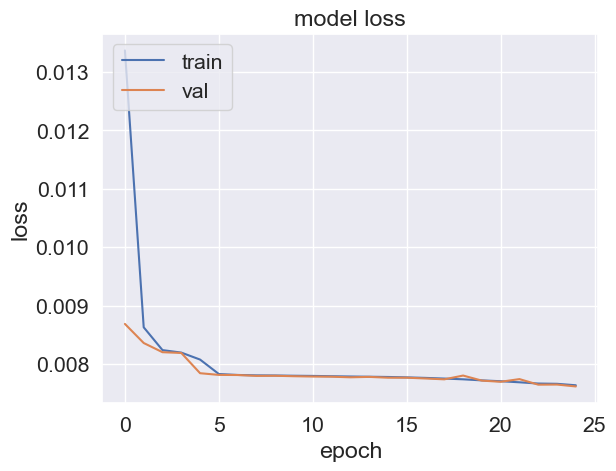


Saved Encoder model to disk

Saved AutoEncoder model to disk

Saved Decoder model to disk
3313/3313 [==============================] - 6s 2ms/step

  activ  n_hl_a  n_cl_a  n_ls_a  batch_size  epochs  seed  patience  run  RMSE-Ts  RMSE-Va  RMSE-Tr  Time[min]
0  relu       4     100       4          64      25   229        15    0    0.087    0.087    0.087       1.66

Simulation: Xs_Xs-Xs_Xs_h_a_0_run_1
Model: "ae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320)]             0         
                                                                 
 encoder (Functional)        (None, 4)                 38789     
                                                                 
 decoder (Functional)        (None, 320)               39105     
                                                                 
Total params: 77,894
Trainable params: 77,894
Non-tr

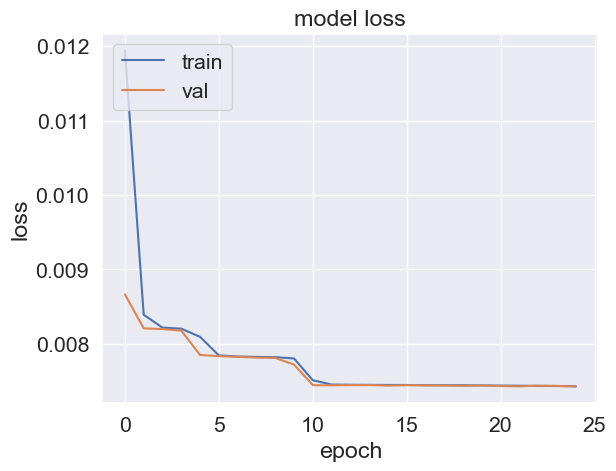


Saved Encoder model to disk

Saved AutoEncoder model to disk

Saved Decoder model to disk
3313/3313 [==============================] - 6s 2ms/step

  activ  n_hl_a  n_cl_a  n_ls_a  batch_size  epochs  seed  patience  run  RMSE-Ts  RMSE-Va  RMSE-Tr  Time[min]
0  relu       4     100       4          64      25   229        15    0    0.087    0.087    0.087       1.66
1  relu       4     100       4          64      25   229        15    1    0.085    0.086    0.086       1.62


In [92]:
# Working folder: storage
ROOT_PATH_2 = 'models/99-AE-MIMII'
MODEL_PATH_2 = ROOT_PATH_2  + '/' + strftime("%Y-%m-%d", gmtime()) + '/'

if not os.path.exists(MODEL_PATH_2):
    os.makedirs(MODEL_PATH_2)

# Fit model
df, log_label_2, log_loss_val = grid_search_ul(MODEL_PATH_2,
                                X_train, Y_train, 
                                X_val, Y_val,
                                X_test, Y_test,
                                params, n_runs, var_input, 
                                generate=True)


In [93]:
# Select model with best loss on validation set!!
log_loss_val = np.array(log_loss_val)
mask = np.ravel(log_loss_val==min(log_loss_val))
label = list(itertools.compress(log_label_2, mask))[0]
print(label)

model = tf.keras.models.load_model(MODEL_PATH_2 + 'model_AE_' + str(label) + '.h5')
Y_hat_train = model.predict(x=X_train)
Y_hat_val = model.predict(x=X_val)
Y_hat_test = model.predict(x=X_test)

Xs_Xs-Xs_Xs_h_a_0_run_1
3313/3313 [==============================] - 6s 2ms/step


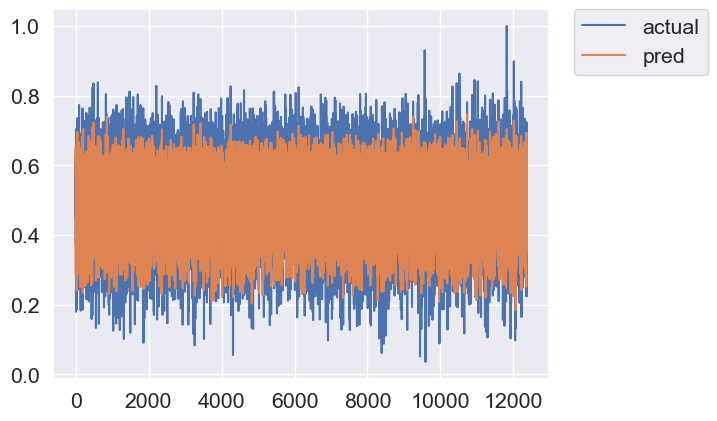

In [94]:
plt.plot(X_val[:,1], label = "actual")
plt.plot(Y_hat_val[:,1], label = "pred")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [ ]:
# Select model with best loss on validation set!!
log_loss_val = np.array(log_loss_val)
mask = np.ravel(log_loss_val==min(log_loss_val))
label = list(itertools.compress(log_label_2, mask))[0]
print(label)

model = tf.keras.models.load_model(MODEL_PATH_2 + 'model_E_' + str(label) + '.h5')
Z_hat_train = model.predict(x=X_train)
Z_hat_val = model.predict(x=X_val)
Z_hat_test = model.predict(x=X_test)

In [96]:
# latent space dimension of the encoder
df_Z_train = pd.DataFrame(Z_hat_train)
df_Z_train

,0,1,2,3
0,0.746840,0.854802,1.038511,-3.455055
1,0.154897,1.285812,0.972137,-1.914973
2,0.686057,0.771170,0.471646,-2.325138
3,0.624102,1.536584,1.351841,-2.981053
4,1.007339,1.177417,1.091802,-3.474183
...,...,...,...,...
49435,0.256396,1.231999,1.106074,-3.073042
49436,0.677336,0.662667,0.618450,-2.127174
49437,0.836100,1.141435,1.088599,-2.804121
49438,0.219511,1.316816,1.125896,-2.772580


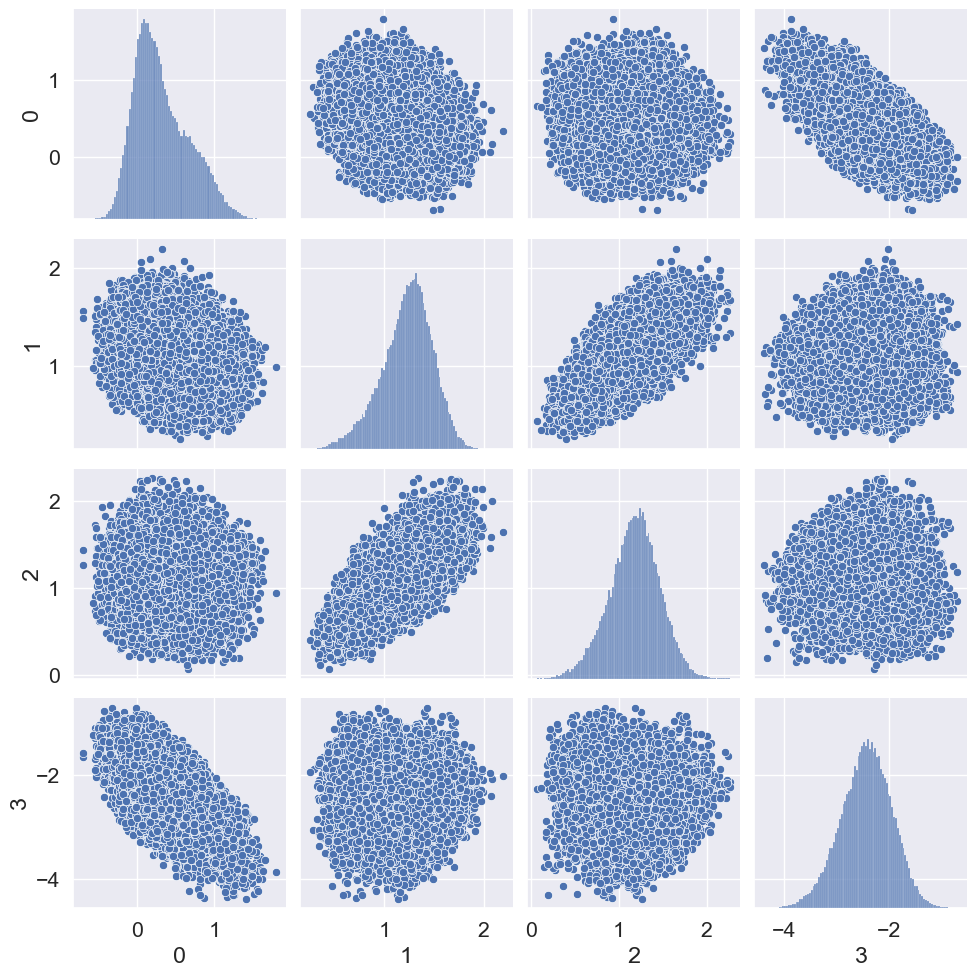

In [97]:
# Plot
sns.set(font_scale=1.4)
sns.pairplot(df_Z_train)

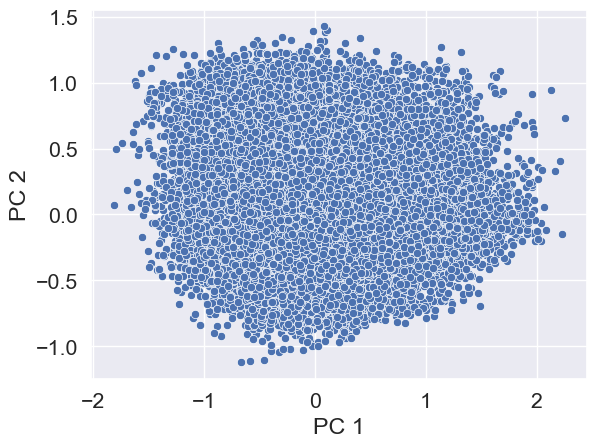

In [98]:
# apply PCA

# substract the mean
X = Z_hat_train - Z_hat_train.mean(axis = 0)

# pca with x dim
pca = PCA(n_components = 2)

# project the data on the new dimension
projected = pca.fit_transform(X)

df_projected = pd.DataFrame(projected[:, :2], columns=['PC 1', 'PC 2'])

#plot - what can you observe from the plot?
# plt.scatter(projected[:, 0], projected[:, 1], c=labels , edgecolor='none', alpha=0.5)
sns.scatterplot(data=df_projected, x='PC 1', y='PC 2')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# plt.colorbar()
plt.show()

df_projected_2 = pd.DataFrame(projected)

In [100]:
log_loss_val = np.array(log_loss_val)
def recon_res_err(data):
    """
    Takes best model from today and calculate mse between
    prediciton and and given data
    """
    
    mask = np.ravel(log_loss_val==min(log_loss_val))
    label = list(itertools.compress(log_label_2, mask))[0]
    print(label)

    model = tf.keras.models.load_model(MODEL_PATH_2 + 'model_AE_' + str(label) + '.h5')
    data_pred = model.predict(x=data)

    recon_errors = np.mean(np.power(data - data_pred, 2), axis=1)
    delta = data - data_pred
    return recon_errors, delta

In [101]:
recon_errors_train, delta_train = recon_res_err(X_train)
recon_errors_val, delta_val = recon_res_err(X_val)
recon_errors_test, delta_test = recon_res_err(data_n_test)

Xs_Xs-Xs_Xs_h_a_0_run_1
1545/1545 [==============================] - 3s 2ms/step
Xs_Xs-Xs_Xs_h_a_0_run_1
387/387 [==============================] - 1s 2ms/step
Xs_Xs-Xs_Xs_h_a_0_run_1
3313/3313 [==============================] - 6s 2ms/step


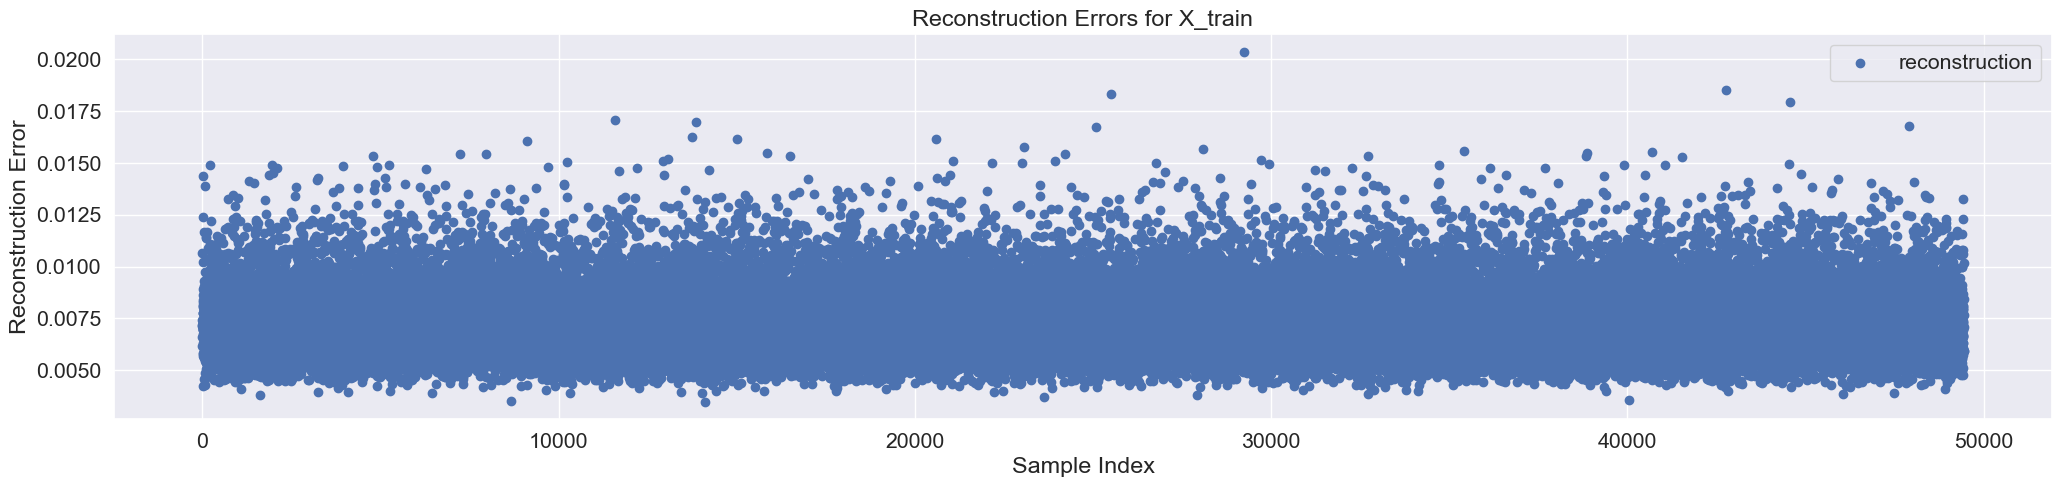

In [102]:
plt.figure(figsize = (25,5))
plt.scatter(np.arange(len(recon_errors_train)), recon_errors_train, label = 'reconstruction')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors for X_train')

plt.legend()
plt.show()


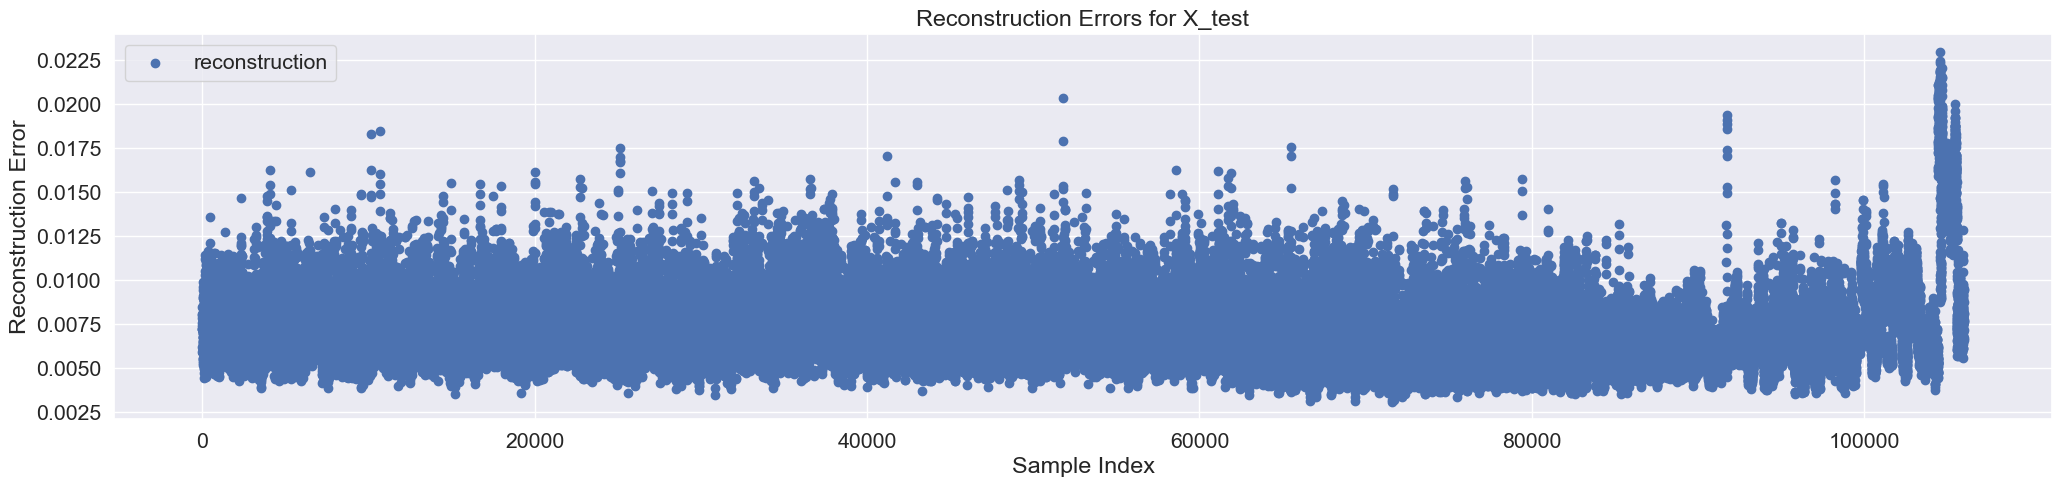

In [103]:
plt.figure(figsize = (25,5))
plt.scatter(np.arange(len(recon_errors_test)), recon_errors_test, label = 'reconstruction')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors for X_test')

plt.legend()
plt.show()

In [122]:
from sklearn.metrics import precision_recall_curve



precision, recall, threshold = precision_recall_curve(Y_test, Y_hat_test)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


(105987, 320)


ValueError: y should be a 1d array, got an array of shape (105987, 320) instead.